In [1]:
from src.models.gpt import GPTModel
from dataclasses import dataclass
from src.utils import Tokenizer
import torch
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import Plotter, pad_to

In [2]:
@dataclass
class Config:
    batch_size = 2048
    epochs = 1000
    vocab_size = 550
    lr = 6e-4
    wd = 1e-5
    n_embed = 256
    num_blocks = 4
    num_heads = 4
    head_size = n_embed // num_heads
    context_len = 64
    attn_drop_value = 0.2
    multihead_drop_value = 0.2
    ffn_drop_value = 0.2
    min_tokens = 5


config = Config()

model = GPTModel.load_from_checkpoint("checkpoints/main.ckpt", config=config)

In [2]:
df = pd.read_csv("data/raw/climbs.csv", index_col=0)
plotter = Plotter()
tokenizer = Tokenizer(df["frames"])

AttributeError: 'Tokenizer' object has no attribute 'df'

In [7]:
prompts = ["p1151r12p1153r12", "p1234r13p1136r12", "p1379r14p1157r12", "p1340r13p1360r13"]

encoded_prompts = pad_to(
    torch.stack([tokenizer.encode(prompt) for prompt in prompts])[:, :-1],
    config.context_len,
    tokenizer.encode_map[tokenizer.pad_token],
).to(model.device)
encoded_prompts

tensor([[ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  0, 10,  5, 11,  5],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  0, 19,  6, 17,  5],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,  2,  0, 41,  7, 31,  5],
        [ 2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  2,

In [1]:
torch.save("data/prompts.pt", encoded_prompts)

NameError: name 'torch' is not defined

In [16]:
generated = model.generate(encoded_prompts, 50, temperature=0.01)

In [17]:
decoded = ["".join(tokenizer.decode(g)).replace("[PAD]", "").split("[EOS]")[0].split("[BOS]")[-1].strip() for g in generated]
decoded

['p1151r12p1153r12p1339r13p1452r13p1452r13p1452r13p1452r13p1452r13p1452r13p1452r13p1334r15p1334r15p1334r15p1277r15p1448r15p1334r15p1393r13p1277r15p1448r15p1478r15p1393r13p1448r15p1234r15p1234r15p1263r15p1234r15p1353r13',
 'p1234r13p1136r12p1452r13p1452r13p1452r13p1452r13p1452r13p1334r15p1334r15p1334r15p1334r15p1263r13p1275r15p1184r14',
 'p1379r14p1157r12p1452r13p1452r13p1452r13p1452r13',
 'p1340r13p1360r13p1452r13p1452r13p1452r13p1452r13p1184r15p1275r15p1275r15p1236r15p1184r15p1275r15p1184r15p1343r15p1343r15p1340r15p1184r15p1343r15p1379r15p1363r15p1236r15p1310r15p1297r15p1275r15p1105r14p1183r13p1228r13']

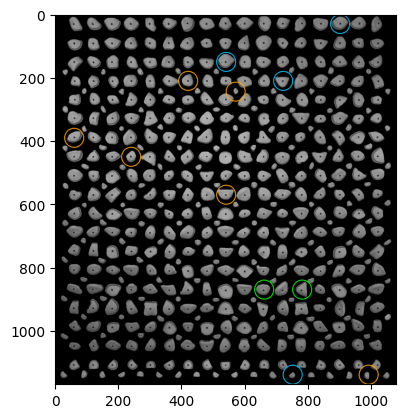

In [19]:
plt.imshow(plotter.plot_climb(decoded[0]))